# Данные проекта «110 к 10 с чем-то»

Курицын В. Проект «110 к 10 с чем-то»

Файл рейтинга поэтов был скачан по [ссылке](http://old.guelman.ru/slava/10/10%20poe.htm)

In [1]:
from bs4 import BeautifulSoup
import re

with open('data/110-10-rating.html') as f:
    soup = BeautifulSoup(f, 'html.parser')

name_pattern = '\d+\s*-\s*\d+\s*(\D+)\s*\d+'
data = []

for record in soup.find_all('p'):
    try:
        place = int(record.text.split()[0])

        if record.a:
            name = record.a.text
        else:
            m = re.search(name_pattern, record.text)
            name = m.group(1)

        if record.b:
            votes = record.b.text
        else:
            votes = 1

        data.append((name, votes, place))

    except Exception as e:
        print('Bad record: {}'.format(record))

data

Bad record: <p><font color="#FF0000" size="+2"><b>Рейтинг поэтов</b></font></p>
Bad record: <p align="CENTER"><a href="http://old.guelman.ru/index.html"><img alt="" border="0" height="31" src="./110-10-rating_files/marat88.gif" width="88"/></a></p>
Bad record: <p>
<!-- banner -->
<iframe frameborder="0" height="60" marginheight="0" marginwidth="0" scrolling="no" src="./110-10-rating_files/slava.html" width="470"><a href="http://rotabanner.gif.ru/cgi-bin/href/slava?6785434986631" target="_top"><img alt="ArtRuNet" border="0" height="60" ismap="" src="http://rotabanner.gif.ru/cgi-bin/banner/slava?6785434986631&amp;курицын, слава, современная русская литература" width="470"/></a></iframe>
</p>


[('Сергей Гандлевский', '38', 1),
 ('Тимур Кибиров', '35', 2),
 ('Лев Лосев', '31', 3),
 ('Дмитрий А.Пригов', '28', 4),
 ('Елена Шварц', '27', 5),
 ('Лев Рубинштейн', '27', 5),
 ('Вера Павлова', '25', 7),
 ('Дмитрий Воденников', '24', 8),
 ('Елена Фанайлова', '23', 9),
 ('Шиш Брянский', '22', 10),
 ('Виктор Соснора', '20', 11),
 ('Всеволод Некрасов', '19', 12),
 ('Иван Жданов', '18', 13),
 ('Михаил Айзенберг', '17', 14),
 ('Ольга Седакова', '17', 14),
 ('Александр Анашевич', '15', 16),
 ('Александр Еременко', '15', 16),
 ('Александр Кушнер', '15', 16),
 ('Светлана Кекова', '14', 19),
 ('Бахыт Кенжеев', '14', 19),
 ('Алексей Парщиков', '14', 19),
 ('Мария Степанова', '14', 19),
 ('Ярослав Могутин', '13', 23),
 ('Геннадий Айги', '13', 23),
 ('Владимир Гандельсман', '12', 25),
 ('Аркадий Драгомощенко', '12', 25),
 ('Станислав Львовский', '11', 25),
 ('Сергей Стратановский', '12', 25),
 ('Михаил Еремин', '10', 29),
 ('Виталий Кальпиди', '9', 30),
 ('Евгений Рейн', '9', 30),
 ('Владимир Стр

In [2]:
import pandas as pd

df = pd.DataFrame.from_records(data, columns=['name', 'votes', 'place'])
df

,name,votes,place
0,Сергей Гандлевский,38,1
1,Тимур Кибиров,35,2
2,Лев Лосев,31,3
3,Дмитрий А.Пригов,28,4
4,Елена Шварц,27,5
...,...,...,...
272,Сергей Чудаков,1,134
273,Екатерина Шевченко,1,134
274,Шмубзик,1,134
275,Сергей Шнуров,1,134


In [3]:
df.to_csv('data/110-10-rating.csv')

In [8]:
df.votes.map(lambda x: int(x)).sum()

1092

In [17]:
df.votes[:20].map(lambda x: int(x)).sum()

444

In [14]:
df.describe()

,place
count,277.000000
mean,97.805054
std,43.551796
min,1.000000
25%,59.000000
50%,134.000000
75%,134.000000
max,134.000000


<AxesSubplot:>

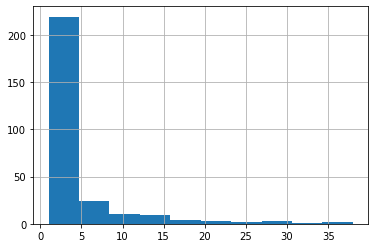

In [20]:
df.votes.map(lambda x: int(x)).hist()

<AxesSubplot:>

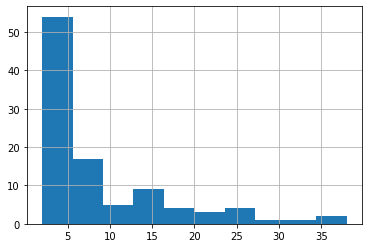

In [24]:
df.votes[:100].map(lambda x: int(x)).hist()